In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/threads_reviews_edited.csv")
df

,source,review_description,rating,Unnamed: 3
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,NaN
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,NaN
2,Google Play,"For a brand new app, it's very well optimized....",3,NaN
3,Google Play,"Great app with a lot of potential! However, th...",3,NaN
4,Google Play,"The app is good, but it needs a lot of functio...",3,NaN
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,NaN
32906,App Store,Add Search and hashtag like Twitter !,1,NaN
32907,App Store,bad twister,1,NaN
32908,App Store,Yet another trash from Meta.,1,NaN


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

***EDA***

In [ ]:
#checking the datatypes
df.dtypes

source                object
review_description    object
rating                 int64
Unnamed: 3            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   Unnamed: 3          1 non-null      object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,rating
count,27228.000000
mean,3.212979
std,1.753075
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.isnull().sum()

source                    0
review_description        0
rating                    0
Unnamed: 3            32909
dtype: int64

In [ ]:
df.duplicated().sum()

5682

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(27228, 4)

<Axes: >

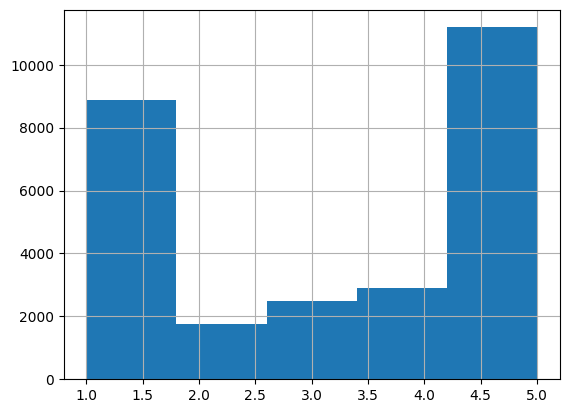

In [ ]:
df["rating"].hist(bins=5)

In [ ]:
df['source'].value_counts()

Google Play    24597
App Store       2631
Name: source, dtype: int64

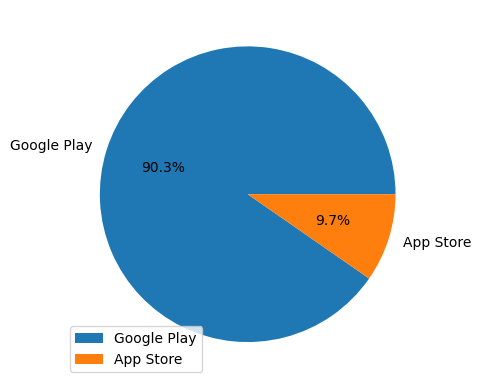

In [ ]:
#checking the source where review is more
labels=['Google Play','App Store']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

<Axes: xlabel='source', ylabel='count'>

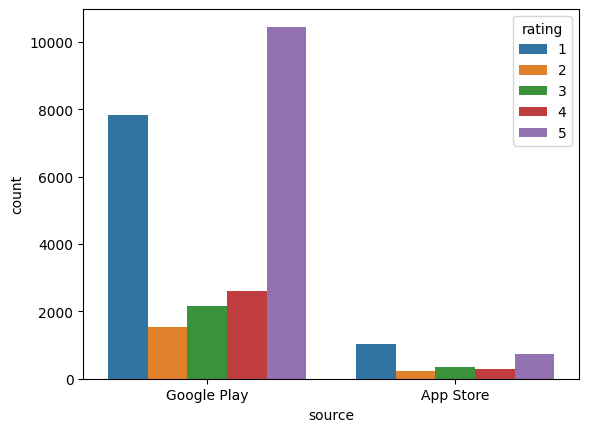

In [ ]:
sns.countplot(x='source',data=df,hue='rating')

<Axes: xlabel='rating', ylabel='Count'>

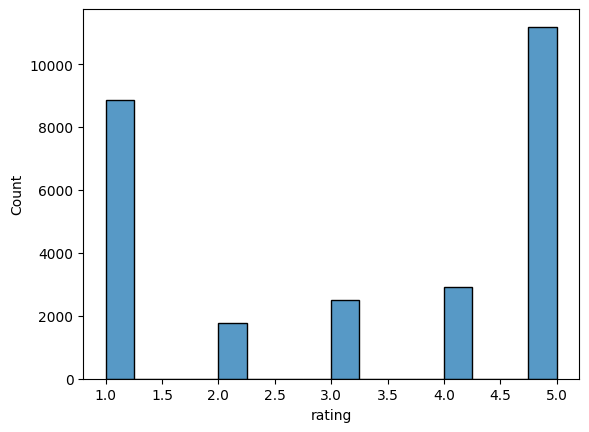

In [ ]:
sns.histplot(x='rating',data=df)

** PERFORMING NLP **

In [ ]:
df['rating']=df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})
df

,source,review_description,rating,Unnamed: 3
0,Google Play,Meh. Not the greatest experience on a Chromebo...,-1,NaN
1,Google Play,Pretty good for a first launch!! Its easy to u...,0,NaN
2,Google Play,"For a brand new app, it's very well optimized....",0,NaN
3,Google Play,"Great app with a lot of potential! However, th...",0,NaN
4,Google Play,"The app is good, but it needs a lot of functio...",0,NaN
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,-1,NaN
32906,App Store,Add Search and hashtag like Twitter !,-1,NaN
32907,App Store,bad twister,-1,NaN
32908,App Store,Yet another trash from Meta.,-1,NaN


In [ ]:
#dropping other columns
df.drop(['source'],axis=1,inplace=True)

In [ ]:
df

,review_description,rating,Unnamed: 3
0,Meh. Not the greatest experience on a Chromebo...,-1,NaN
1,Pretty good for a first launch!! Its easy to u...,0,NaN
2,"For a brand new app, it's very well optimized....",0,NaN
3,"Great app with a lot of potential! However, th...",0,NaN
4,"The app is good, but it needs a lot of functio...",0,NaN
...,...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1,NaN
32906,Add Search and hashtag like Twitter !,-1,NaN
32907,bad twister,-1,NaN
32908,Yet another trash from Meta.,-1,NaN


In [ ]:
df['rating'].unique()


array([-1,  0,  1])

In [ ]:
df['rating'].value_counts()

 1    14105
-1    10632
 0     2491
Name: rating, dtype: int64

In [ ]:
rev=df.review_description
rev

0        Meh. Not the greatest experience on a Chromebo...
1        Pretty good for a first launch!! Its easy to u...
2        For a brand new app, it's very well optimized....
3        Great app with a lot of potential! However, th...
4        The app is good, but it needs a lot of functio...
                               ...                        
32905    This killed my dog. Mark zuckerburg strangled ...
32906                Add Search and hashtag like Twitter !
32907                                          bad twister
32908                         Yet another trash from Meta.
32909    Nothing special this app is just a copy of twi...
Name: review_description, Length: 27228, dtype: object

In [ ]:
#remove special characters
rev=rev.str.replace('[^a-zA-Z0-9]+'," ")
rev

0        Meh Not the greatest experience on a Chromeboo...
1        Pretty good for a first launch Its easy to use...
2        For a brand new app it s very well optimized H...
3        Great app with a lot of potential However ther...
4        The app is good but it needs a lot of function...
                               ...                        
32905    This killed my dog Mark zuckerburg strangled h...
32906                 Add Search and hashtag like Twitter 
32907                                          bad twister
32908                         Yet another trash from Meta 
32909    Nothing special this app is just a copy of twi...
Name: review_description, Length: 27228, dtype: object

In [ ]:
#plotting the word cloud of negative values
a=df.loc[df['rating']==-1][['review_description','rating']]
a

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,-1
5,"Currently, it's very challenging to use. It's ...",-1
6,I still don’t want to see content from people ...,-1
7,Could be great if all pages loaded when you cl...,-1
10,"Over all, the UI of this app is good. Using it...",-1
...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1
32906,Add Search and hashtag like Twitter !,-1
32907,bad twister,-1
32908,Yet another trash from Meta.,-1


In [ ]:
text_corpus = ' '.join(a['review_description'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_corpus)


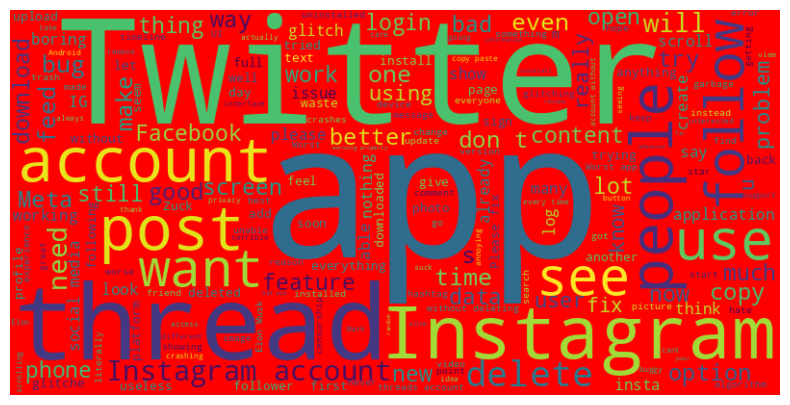

In [ ]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#plotting the word cloud of neutral values
b=df.loc[df['rating']==0][['review_description','rating']]
b

,review_description,rating
1,Pretty good for a first launch!! Its easy to u...,0
2,"For a brand new app, it's very well optimized....",0
3,"Great app with a lot of potential! However, th...",0
4,"The app is good, but it needs a lot of functio...",0
8,I'm liking the concept! There is room for impr...,0
...,...,...
32857,Please add arabic language .,0
32862,Add gyphy - to reply 🙏 love new apps!,0
32864,i really just wanna say anything i want,0
32870,Threads is Twitter without a soul. It’s not tr...,0


In [ ]:
text_corpus = ' '.join(b['review_description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)


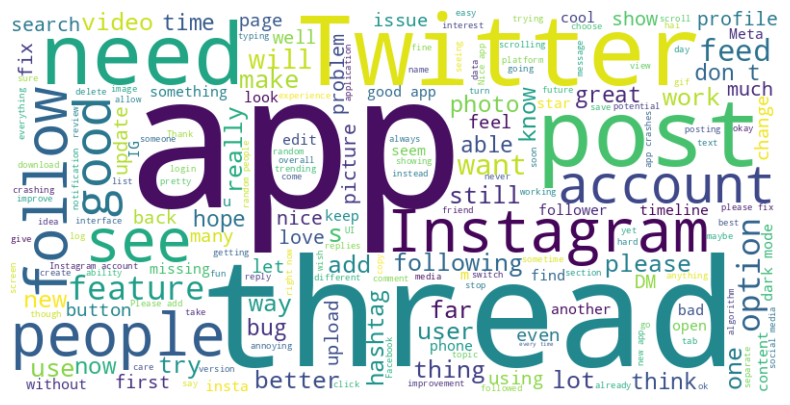

In [ ]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#plotting the word cloud of positive values
c=df.loc[df['rating']==1][['review_description','rating']]
c


,review_description,rating
9,Not bad! This is its first launch. There is st...,1
21,"Firstly, I want to express my appreciation for...",1
22,It's not bad so far. A handful of unsolicited ...,1
29,Great App! Loved it from the very first day al...,1
32,It's addicting but feels cramped and messy bec...,1
...,...,...
32890,I’m done with twitter,1
32892,But it’s not Twitter,1
32899,First review!,1
32900,Meta the greatest thread #mark Z,1


In [ ]:
text_corpus = ' '.join(c['review_description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_corpus)


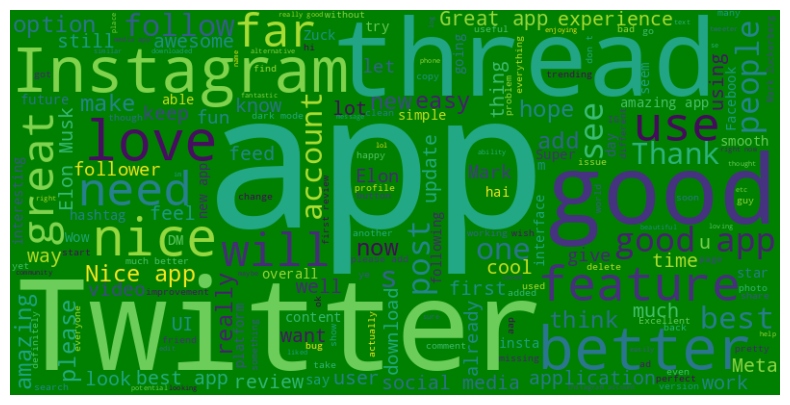

In [ ]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

STEMMING and TOKENOZATION

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [ ]:
ps=PorterStemmer()
rev=rev.apply(lambda x:[ps.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y: " ".join(y))
rev

0        meh not the greatest experi on a chromebook se...
1        pretti good for a first launch it easi to use ...
2        for a brand new app it s veri well optim howev...
3        great app with a lot of potenti howev there is...
4        the app is good but it need a lot of function ...
                               ...                        
32905    thi kill my dog mark zuckerburg strangl him my...
32906                  add search and hashtag like twitter
32907                                          bad twister
32908                            yet anoth trash from meta
32909       noth special thi app is just a copi of twitter
Name: review_description, Length: 27228, dtype: object

Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
st=stopwords.words('english')
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if i.lower() not in st]).apply(lambda y: " ".join(y))
rev

0        meh greatest experi chromebook seem custom pho...
1        pretti good first launch easi use self explana...
2        brand new app veri well optim howev miss quit ...
3        great app lot potenti howev lot need fix examp...
4        app good need lot function exampl search topic...
                               ...                        
32905        thi kill dog mark zuckerburg strangl dog gone
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                 yet anoth trash meta
32909                    noth special thi app copi twitter
Name: review_description, Length: 27228, dtype: object

In [ ]:
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda y:" ".join(y))
rev

TFIDF VECTORISATION



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(rev)
print(data_vec)

  (0, 5207)	0.15121604801994734
  (0, 4006)	0.09937239041572851
  (0, 6722)	0.09567880499063203
  (0, 11766)	0.10067489781434116
  (0, 4582)	0.09186318436224596
  (0, 818)	0.17685822053630113
  (0, 4152)	0.18339086149982137
  (0, 2498)	0.1455775198342045
  (0, 10288)	0.12936116315745538
  (0, 11256)	0.13621932712438145
  (0, 1414)	0.1792375289891256
  (0, 9977)	0.11032994084248657
  (0, 11831)	0.10192584746894948
  (0, 2989)	0.13209573977807976
  (0, 2176)	0.16378982005436343
  (0, 2459)	0.2250172407198273
  (0, 6472)	0.14057771830413607
  (0, 10699)	0.11833523262590245
  (0, 6123)	0.10742331723198725
  (0, 781)	0.046597927740769006
  (0, 3668)	0.11775990983079132
  (0, 3804)	0.1433497798094028
  (0, 5799)	0.2015160262541652
  (0, 7342)	0.2250172407198273
  (0, 2399)	0.13555596459709587
  :	:
  (27222, 11084)	0.36143347082194766
  (27223, 10194)	0.39993642566483517
  (27223, 12218)	0.3650983375702193
  (27223, 3210)	0.6944568662111021
  (27223, 6067)	0.2945204405462669
  (27223, 6812)	

In [ ]:
y=df['rating'].values
y

array([-1,  0,  0, ..., -1, -1, -1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,random_state=1)


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[sv,dt,rf,ad]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

          -1       0.77      0.75      0.76      2079
           0       0.41      0.03      0.05       518
           1       0.77      0.91      0.83      2849

    accuracy                           0.77      5446
   macro avg       0.65      0.56      0.55      5446
weighted avg       0.73      0.77      0.73      5446

DecisionTreeClassifier()
              precision    recall  f1-score   support

          -1       0.69      0.68      0.68      2079
           0       0.17      0.10      0.13       518
           1       0.75      0.81      0.78      2849

    accuracy                           0.69      5446
   macro avg       0.54      0.53      0.53      5446
weighted avg       0.67      0.69      0.68      5446

RandomForestClassifier()
              precision    recall  f1-score   support

          -1       0.73      0.77      0.75      2079
           0       0.20      0.01      0.02       518
           1       

In [ ]:
y_new=model.predict(tf1.transform(["Threads falls short due to its relentlessly grim and harrowing portrayal of a post-apocalyptic world, leaving audiences emotionally drained and overwhelmed"]))
if y_new==-1:
    print("Negative")
if y_new==0:
    print("Neutral")
if y_new==1:
    print("Positive")

Negative


In [ ]:
y_new=model.predict(tf1.transform(["Threads is an exceptional film that artfully weaves together powerful storytelling, outstanding performances and breathtaking visuals to deliver a poignant and thought-provoking cinematic experience"]))
if y_new==-1:
    print("Negative")
if y_new==0:
    print("Neutral")
if y_new==1:
    print("Positive")

Positive
